In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
data_path = '../../data/postprocessed/PM/'

mapping_table = {
    'backprop': 'Backpropagation algorithm',
    'gaussian': 'Gaussian Elimination',
    'gpu': 'Stream Cluster',
    'lenet': 'Lenet5',
    'gpuburn': 'GPU-burn'
}

data_sheet = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if file.endswith('_telemetry.csv') and not file.startswith('srad')]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0]]

    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

../../data/postprocessed/PM/backprop_50_telemetry.csv
../../data/postprocessed/PM/gaussian_10_telemetry.csv
../../data/postprocessed/PM/backprop_20_telemetry.csv
../../data/postprocessed/PM/gpuburn_20_telemetry.csv
../../data/postprocessed/PM/lenet_50_telemetry.csv
../../data/postprocessed/PM/gpuburn_100_telemetry.csv
../../data/postprocessed/PM/gpuburn_50_telemetry.csv
../../data/postprocessed/PM/lenet_30_telemetry.csv
../../data/postprocessed/PM/lenet_80_telemetry.csv
../../data/postprocessed/PM/lenet_20_telemetry.csv
../../data/postprocessed/PM/gaussian_20_telemetry.csv
../../data/postprocessed/PM/gpuburn_80_telemetry.csv
../../data/postprocessed/PM/lenet_1_telemetry.csv
../../data/postprocessed/PM/gaussian_80_telemetry.csv
../../data/postprocessed/PM/lenet_10_telemetry.csv
../../data/postprocessed/PM/gaussian_100_telemetry.csv
../../data/postprocessed/PM/gaussian_1_telemetry.csv
../../data/postprocessed/PM/backprop_100_telemetry.csv
../../data/postprocessed/PM/backprop_80_telemetry

### Drop meaningless columns

In [24]:
data_sheet

,timestamp_ns,gpu_index,name,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,clock_mem_MHz,clock_graphics_MHz,fan_speed_percent,power_draw_W,ecc_volatile_corrected,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,Range,App_name
0,17884292608512,0,NVIDIA GeForce RTX 4060 Laptop GPU,51,2,0,8188,353,7835,2040,7000,2040,-1,15.738,-1,-1,-1,-1,50,Backpropagation algorithm
1,17521054705405,0,NVIDIA GeForce RTX 4060 Laptop GPU,51,4,0,8188,353,7834,2040,5500,2040,-1,14.422,-1,-1,-1,-1,10,Gaussian Elimination
2,17522060022145,0,NVIDIA GeForce RTX 4060 Laptop GPU,51,2,0,8188,475,7713,2040,7000,2040,-1,14.866,-1,-1,-1,-1,10,Gaussian Elimination
3,17523062503821,0,NVIDIA GeForce RTX 4060 Laptop GPU,52,2,0,8188,475,7713,2040,7000,2040,-1,16.241,-1,-1,-1,-1,10,Gaussian Elimination
4,17524065790615,0,NVIDIA GeForce RTX 4060 Laptop GPU,52,2,0,8188,475,7713,2040,7000,2040,-1,16.355,-1,-1,-1,-1,10,Gaussian Elimination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,17873029232405,0,NVIDIA GeForce RTX 4060 Laptop GPU,51,0,0,8188,353,7835,210,405,210,-1,3.226,-1,-1,-1,-1,30,GPU-burn
971,17874031100743,0,NVIDIA GeForce RTX 4060 Laptop GPU,51,0,0,8188,353,7835,210,405,210,-1,3.245,-1,-1,-1,-1,30,GPU-burn
972,17875032061748,0,NVIDIA GeForce RTX 4060 Laptop GPU,50,0,0,8188,353,7835,210,405,210,-1,3.272,-1,-1,-1,-1,30,GPU-burn
973,17876033981158,0,NVIDIA GeForce RTX 4060 Laptop GPU,50,0,0,8188,353,7835,210,405,210,-1,3.276,-1,-1,-1,-1,30,GPU-burn


In [25]:
metrics_map = {
    'temperature_C':'Temperature [°C]',
    'util_gpu_percent': 'GPU Utilization [%]',
    'util_mem_percent':'GPU Memory Utilization [%]',
    'mem_used_MB':'Used Memory [MB]', 
    'mem_free_MB':'Free Memory [MB]', 
    'clock_sm_MHz':'Streaming Multiprocessor Clock Frequency [MHz]', 
    'clock_mem_MHz':'Memory Clock Frequency [MHz]', 
    'power_draw_W':'GPU Power Consumption [W]'
}
data_sheet.rename(columns=metrics_map, inplace=True)

In [26]:
data_sheet.drop(labels=['ecc_volatile_uncorrected', 'ecc_volatile_uncorrected', 'ecc_aggregate_corrected', 'ecc_aggregate_uncorrected', 'fan_speed_percent'], axis=1, inplace=True)

In [38]:
hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']

def plot_gpu_metric(df, column_name):
    df['timestamp_s'] = df['timestamp_ns'] / 1e9
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=df, x='timestamp_s', y=column_name, ax=ax, hue='App_name', hue_order=hue_order)
    ax.set_title(f'{column_name} over time', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel(column_name, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.tight_layout()
    plt.show()

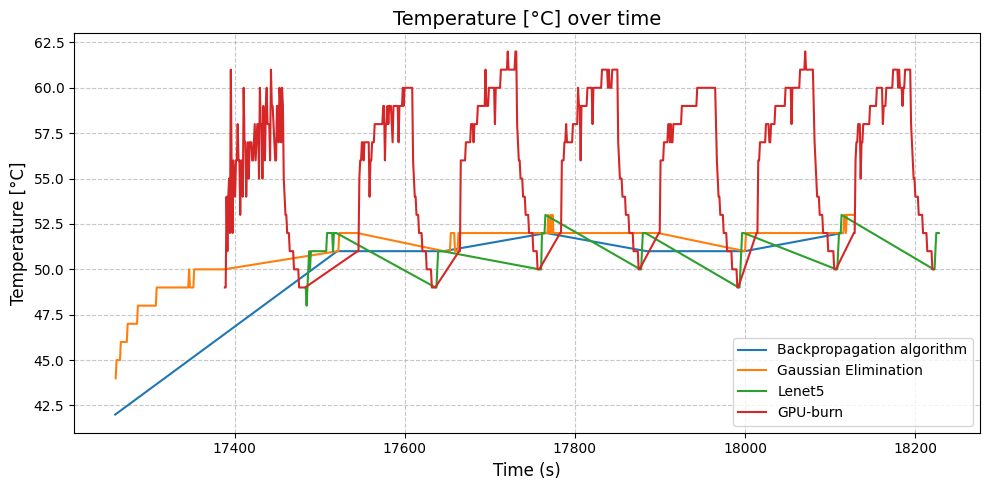

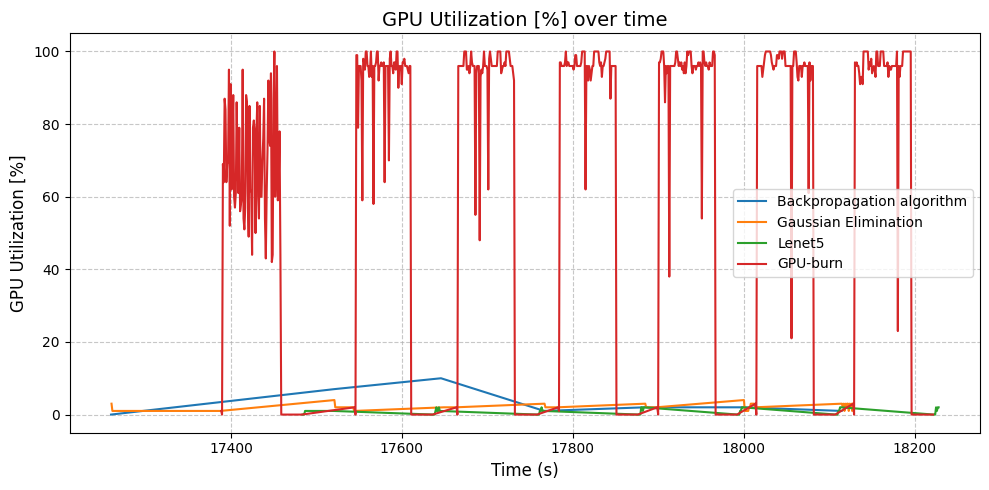

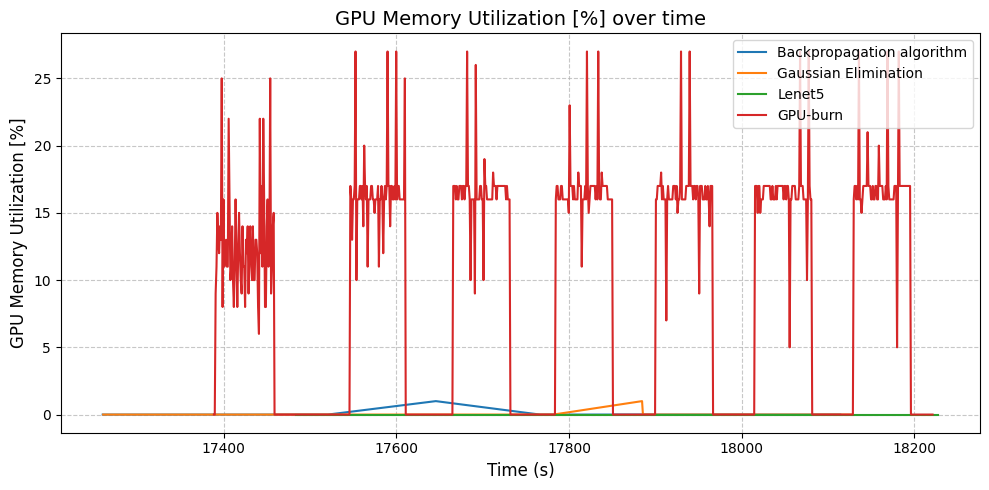

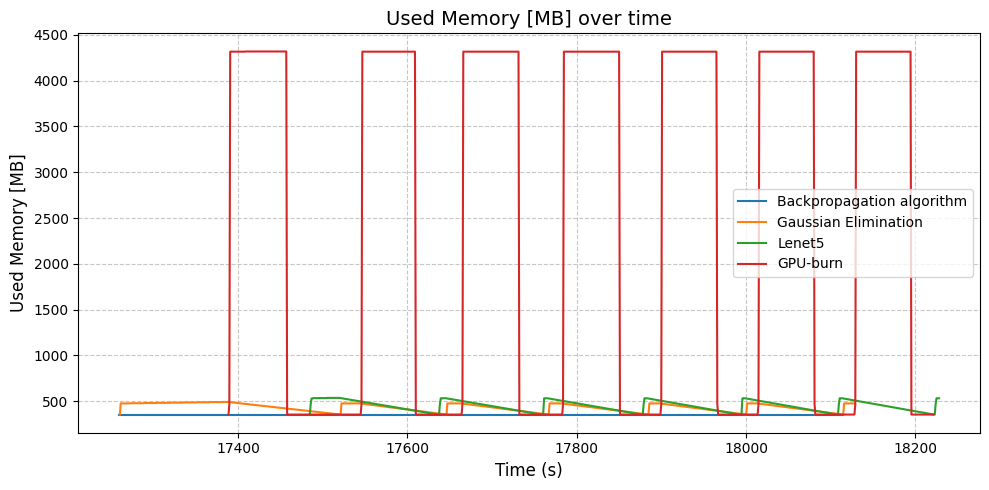

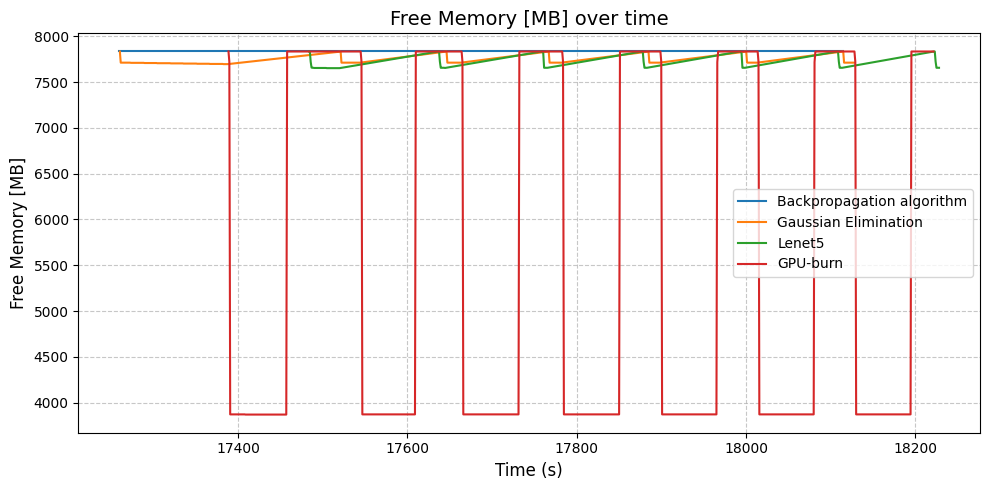

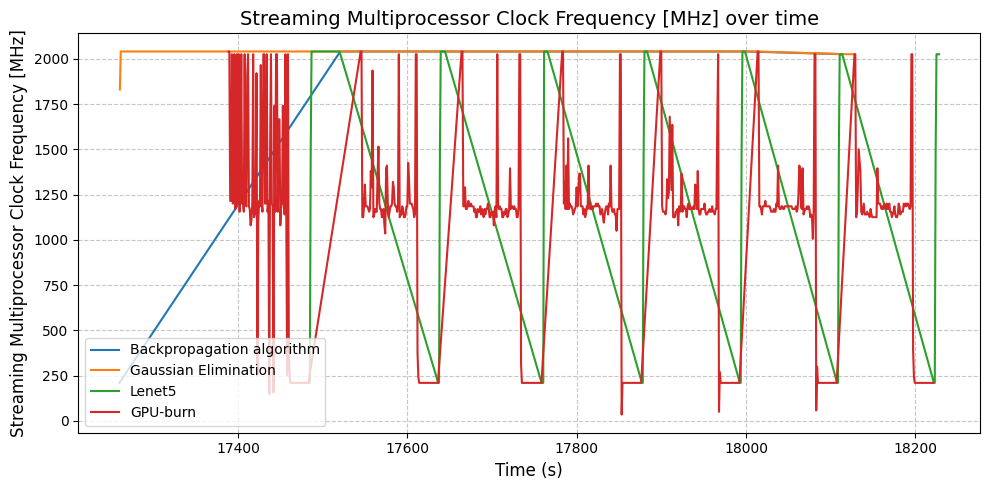

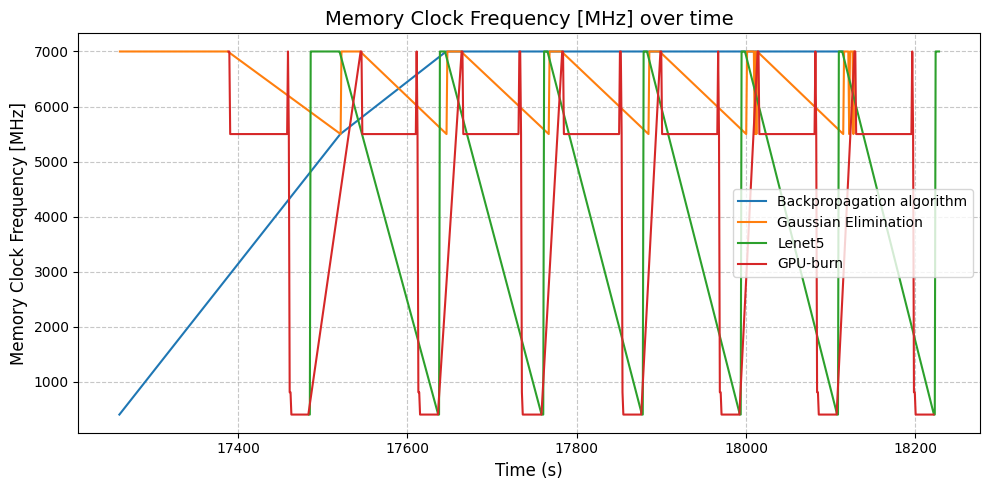

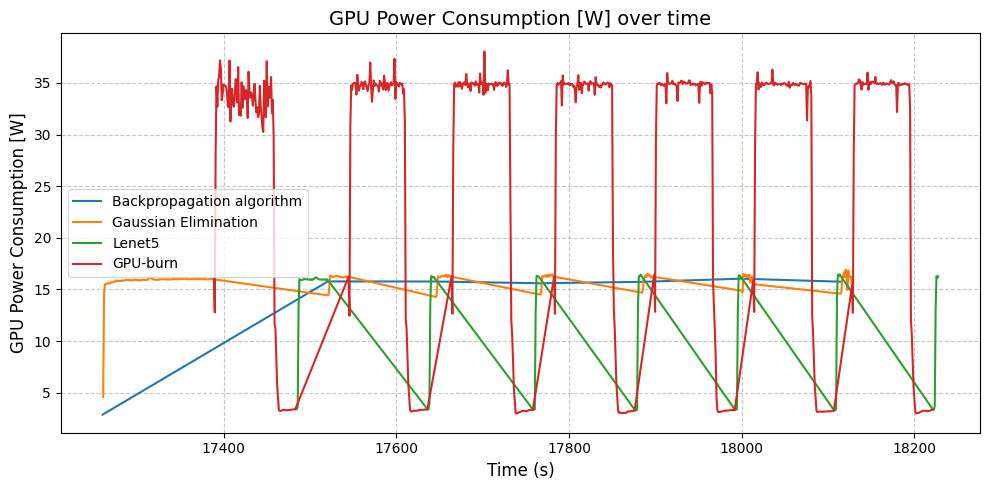

In [39]:
for column in metrics_map.values():
    plot_gpu_metric(data_sheet, column)